In [40]:
#checking the drama by using polar plots and histograms of binning the distribution
#extract the np arrays from the csv files
import numpy as np
V1 = np.genfromtxt('D:/Data/Matlab/VN1_3_0.0_1.csv',dtype = float)
V2 = np.genfromtxt('D:/Data/Matlab/VN2_3_0.0_1.csv', dtype= float)
t  = np.genfromtxt('D:/Data/Matlab/Time_3_0.0_1.csv', dtype= float)

In [41]:
#now that we have arrays, we are to convolve them based on their spike train. 
#the spike train of each are first normalized to spiking and non-spiking regions.
y1=V1
y2=V2
y1[y1<10]=0
y1[y1>=10]=1
y2[y2<10]=0
y2[y2>=10]=1

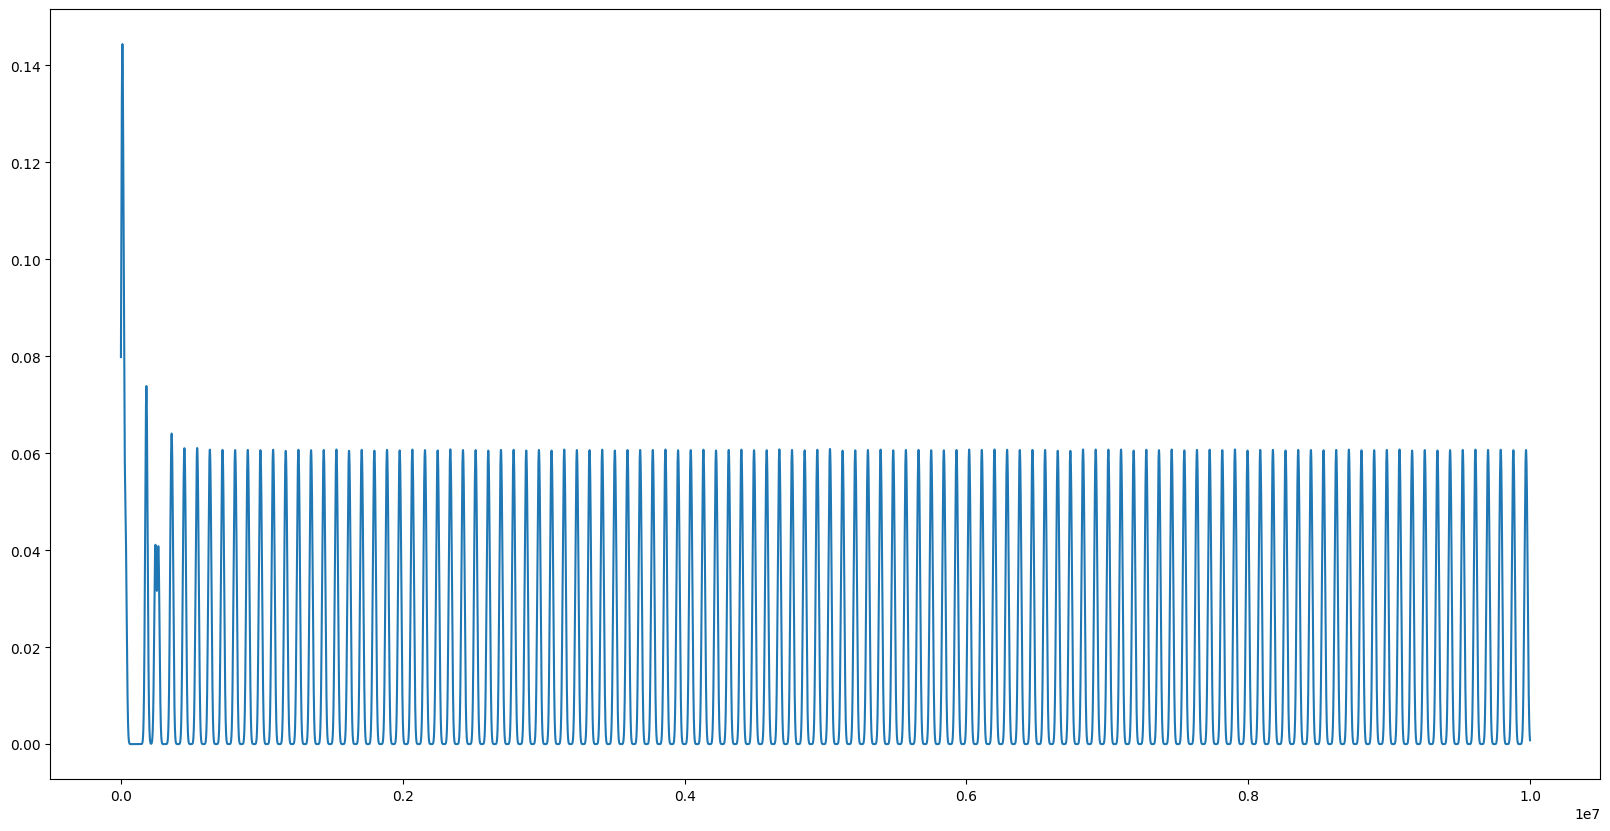

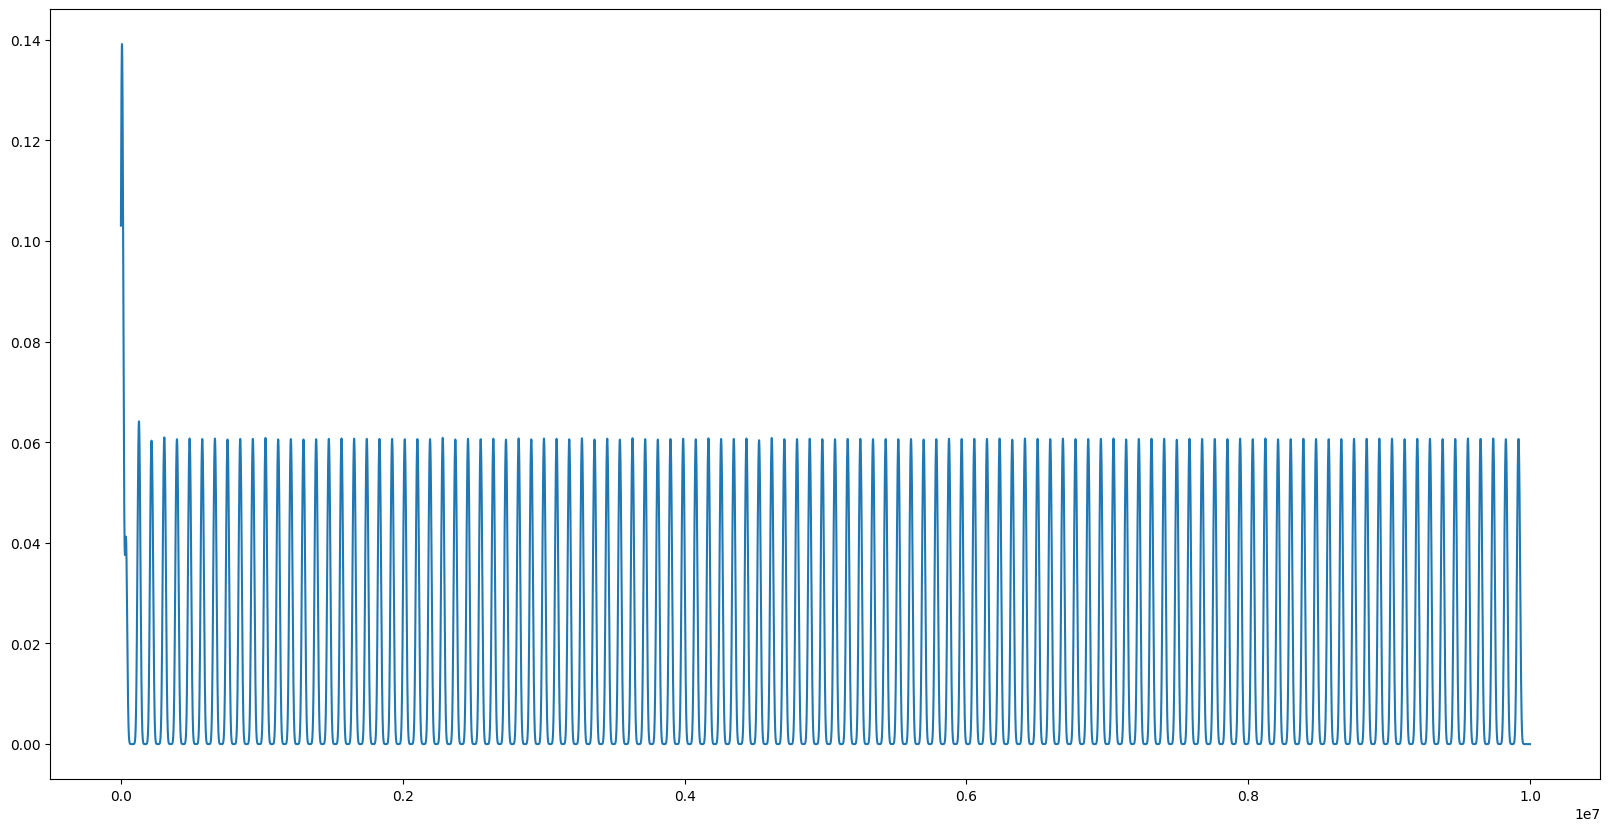

In [42]:
#the spike train is then windowed into a gaussian curve, where the peak is at each burst and the trough is at the non-spiking region
#the signal convolution prevents any kind of noise generated by the signal at smaller timescales that are not in our roi
from scipy import signal
win = signal.windows.gaussian(len(y1),8000)
filtered = signal.convolve(y1, win, mode='same') / sum(win)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(filtered)

win2 = signal.windows.gaussian(len(y2),8000)
filtered2 = signal.convolve(y2, win, mode='same') / sum(win)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(filtered2)
plt.show()


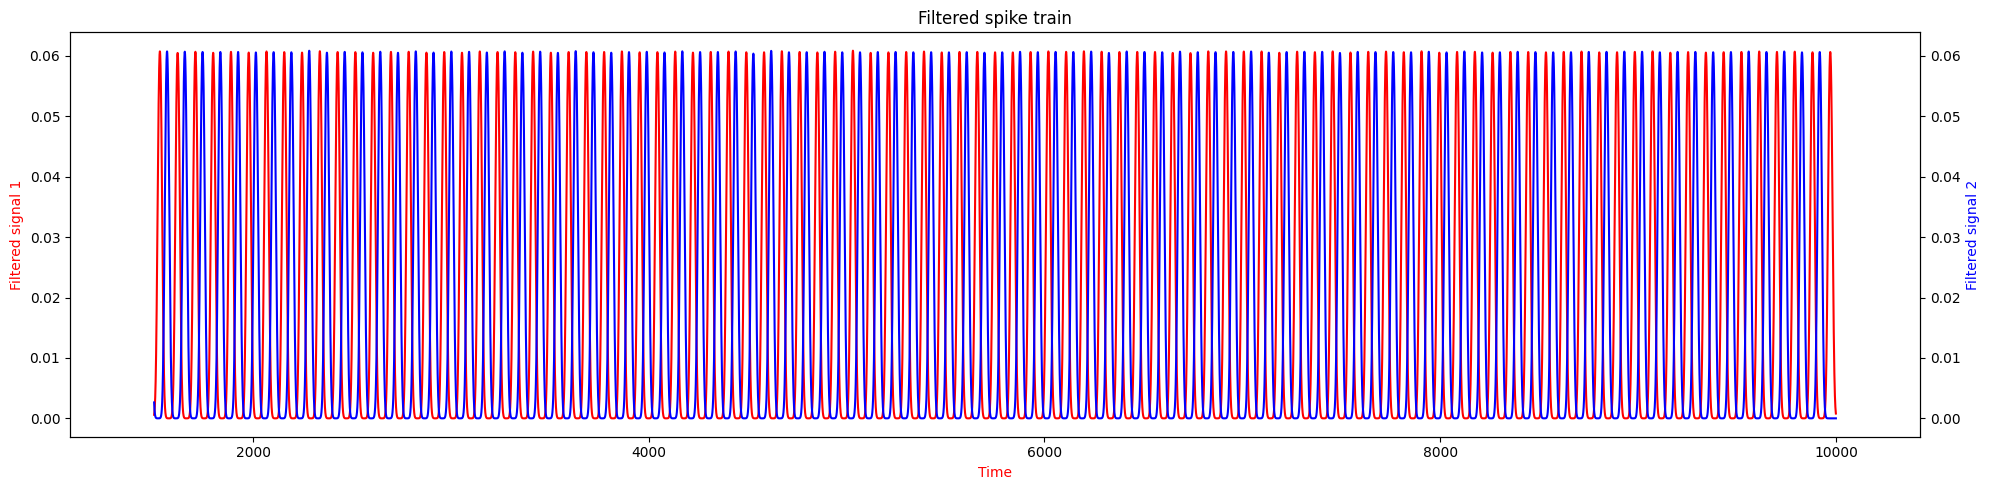

In [43]:
#Remove the initial noisy data of 1.5s after which the steady state behavior is observed 
time = t[1500000:]
# y-axis values
xy1 = filtered[1500000:]
 
# secondary y-axis values
xy2 = filtered2[1500000:]
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (20, 5))
plt.title('Filtered spike train')
 
# using the twinx() for creating another
# axes object for secondary y-Axis

ax.plot(time, xy1, color = 'r')
ax2 = ax.twinx()
ax2.plot(time, xy2, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('Time', color = 'r')
ax.set_ylabel('Filtered signal 1', color = 'r')
 
# secondary y-axis label
ax2.set_ylabel('Filtered signal 2', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

In [44]:
#So I realised that it would be a bit difficult to get nice results given that I am taking complex ka mag
#I am now writing the code to take the arctan of the imag/real component of the hilbert transform

from scipy.signal import hilbert
#let V1 be our time series of neuron 1
# V1 should actually be xy1 the convolved, filtered signal whose initial variability has been removed
real_signal_V1 = np.real(hilbert(xy1))               #x(t) or the real signal
imag_signal_V1 = np.imag(hilbert(xy1))               #~x(t) or the analytical signal
p_V1 = np.divide(imag_signal_V1,real_signal_V1)     # x~(t)/x(t) or the imag/real of the signal 
phase_V1 = np.arctan(p_V1)                          #Hilbert phase of the signal

#let V2 be our time serioes of neuron 2
# V2 should actually be xy2 the convolved, filtered signal whose initial variability has been removed
real_signal_V2 = np.real(hilbert(xy2))               #x(t) or the real signal
imag_signal_V2 = np.imag(hilbert(xy2))               #~x(t) or the analytical signal
p_V2 = np.divide(imag_signal_V2,real_signal_V2)     # x~(t)/x(t) or the imag/real of the signal 
phase_V2 = np.arctan(p_V2)                          #Hilbert phase of the signal

#Now we have the Hilbert phase of the two different time series data
#Lets calculate the R value which can quantify the synchrony
# R = 1/N * (SUM_t e^i(phase_V1(t_j) - phase_V2(t_j)))
# e^ix = cos x + i sin x
p =0 #counter
N = len(phase_V1)
z_x= np.zeros(N, dtype= complex)
while p<N:
    z_x[p] = complex(0,phase_V1[p]-phase_V2[p])
    p+=1

eix = np.exp(z_x)          #eix is e^ix where x is the hilbert phase difference of the two time series
#Now we have e^i(phi_x(t_j)- phi_y(t_j)) for all j
#We need to take sum and modulus of this

sigma_eix= sum(eix)
sync = abs(sigma_eix)/N              

print(sync)


C:\Users\suman\AppData\Local\Temp\ipykernel_6752\4064553798.py:16: RuntimeWarning: divide by zero encountered in divide
  p_V2 = np.divide(imag_signal_V2,real_signal_V2)     # x~(t)/x(t) or the imag/real of the signal


0.5888029007725114


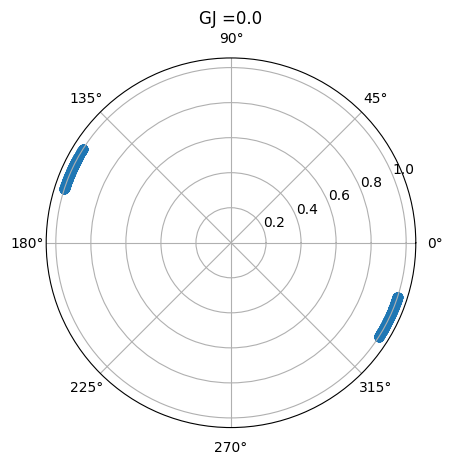

In [45]:
theta = phase_V1 - phase_V2
r = np.ones(len(theta))
fig,ax =plt.subplots(subplot_kw = {'projection':'polar'})
ax.scatter(theta[-1000:-1],r[-1000:-1])
ax.set_title("GJ =0.0")
plt.show()

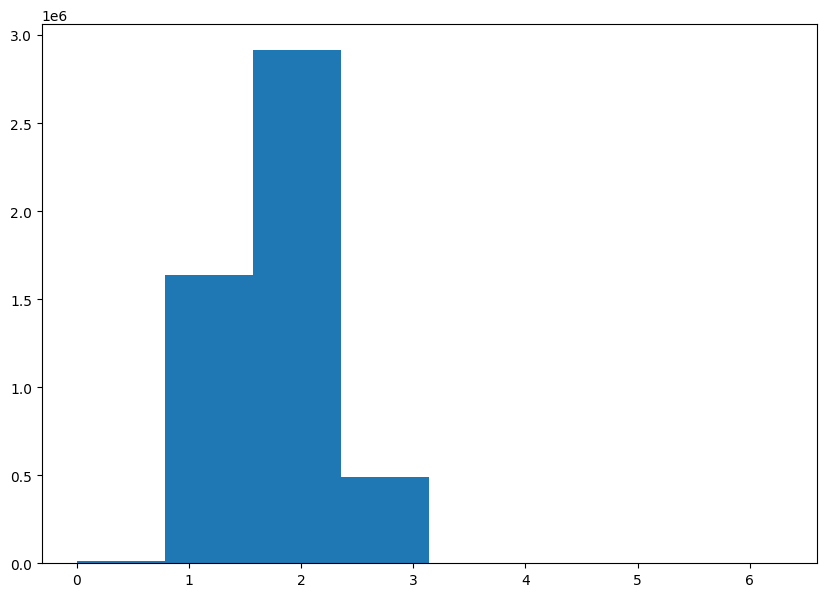

In [46]:
# Creating dataset
a = theta
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi])
 
# Show plot
plt.show()

In [38]:
np.shape(theta)

(8500000,)